# TMDB Box Office Prediction
- Load libraries
- Load data
- Data cleaning
- EDA
- Modeling

# Load Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import missingno as msno
import datetime
import calendar
import ast
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

pd.set_option('display.max_columns', 300)

%matplotlib inline

# Load Data

In [4]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [221]:
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [222]:
test.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."


# Data Cleraning

In [223]:
train.shape

(3000, 23)

In [224]:
test.shape

(4398, 22)

In [225]:
train.isnull().mean().round(2)

id                       0.00
belongs_to_collection    0.80
budget                   0.00
genres                   0.00
homepage                 0.68
imdb_id                  0.00
original_language        0.00
original_title           0.00
overview                 0.00
popularity               0.00
poster_path              0.00
production_companies     0.05
production_countries     0.02
release_date             0.00
runtime                  0.00
spoken_languages         0.01
status                   0.00
tagline                  0.20
title                    0.00
Keywords                 0.09
cast                     0.00
crew                     0.01
revenue                  0.00
dtype: float64

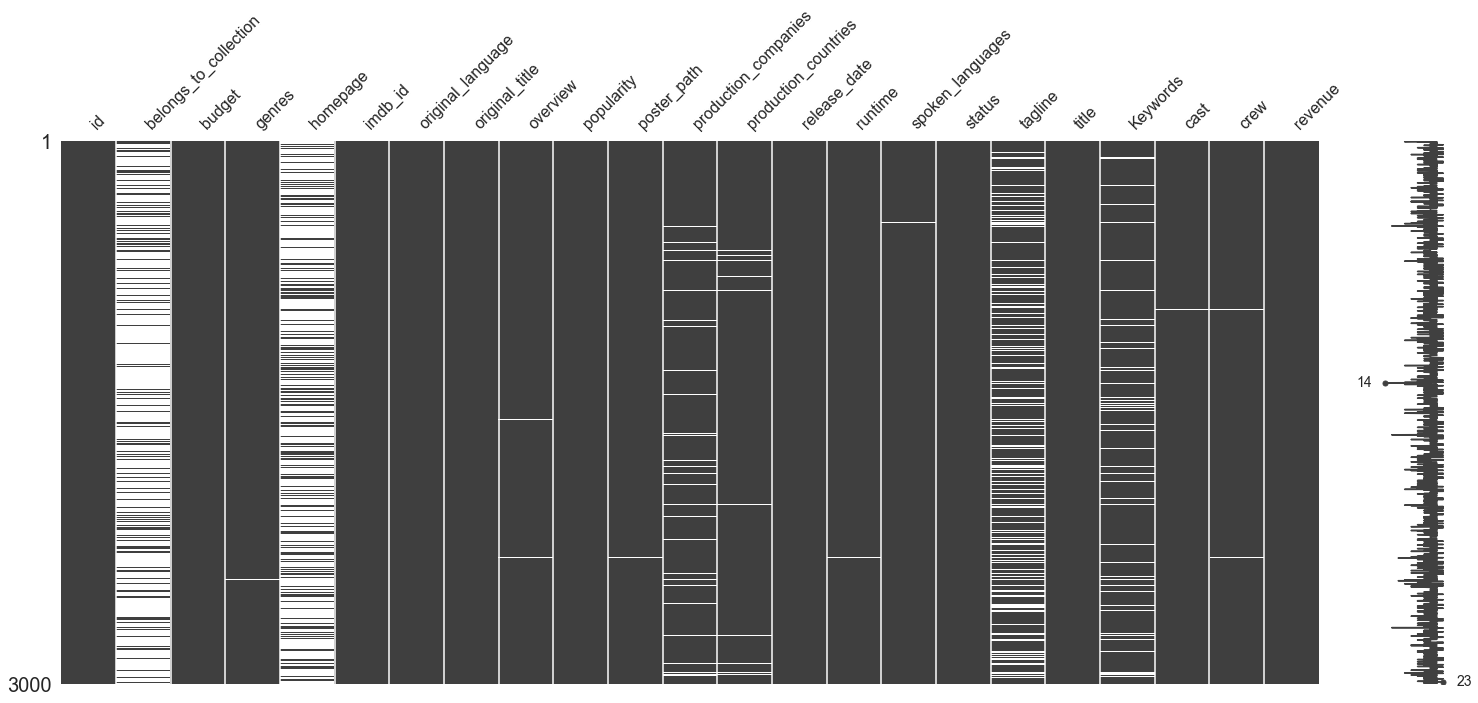

In [226]:
msno.matrix(train)

In [227]:
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [228]:
test.isnull().mean().round(2)

id                       0.00
belongs_to_collection    0.80
budget                   0.00
genres                   0.00
homepage                 0.68
imdb_id                  0.00
original_language        0.00
original_title           0.00
overview                 0.00
popularity               0.00
poster_path              0.00
production_companies     0.06
production_countries     0.02
release_date             0.00
runtime                  0.00
spoken_languages         0.01
status                   0.00
tagline                  0.20
title                    0.00
Keywords                 0.09
cast                     0.00
crew                     0.01
dtype: float64

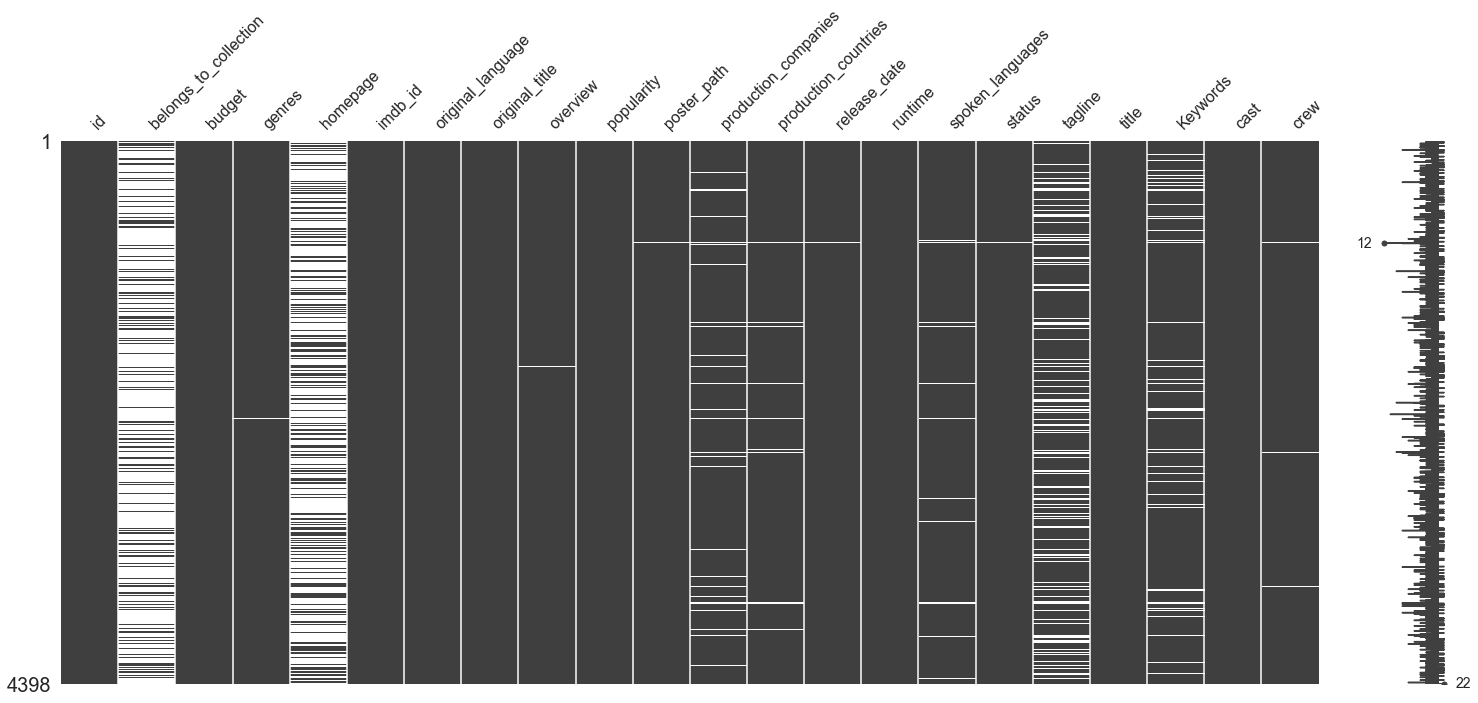

In [229]:
msno.matrix(test)

### Check those columns with complecated data format

In [230]:
train['belongs_to_collection'][:3]

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
Name: belongs_to_collection, dtype: object

In [231]:
train['genres'][:3]

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
Name: genres, dtype: object

In [232]:
train['production_companies'][:3]

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
Name: production_companies, dtype: object

In [233]:
train['production_countries'][:3]

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, dtype: object

In [234]:
train['spoken_languages'][:3]

0    [{'iso_639_1': 'en', 'name': 'English'}]
1    [{'iso_639_1': 'en', 'name': 'English'}]
2    [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, dtype: object

In [235]:
train['Keywords'][:3]

0    [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1    [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2    [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
Name: Keywords, dtype: object

In [236]:
train['cast'][:3]

0    [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1    [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2    [{'cast_id': 5, 'character': 'Andrew Neimann',...
Name: cast, dtype: object

In [237]:
train['crew'][:3]

0    [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1    [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2    [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
Name: crew, dtype: object

### Using ast.literal_eval to convert the data

- ['belongs_to_collection'] will not on the list since it misses 80% data

In [5]:
dict_columns = ['genres', 
                'production_companies', 
                'production_countries', 
                'spoken_languages', 
                'Keywords', 
                'cast', 
                'crew']

def json_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

train = json_to_dict(train)
test = json_to_dict(test)

In [239]:
# genres
list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train['num_genres'] = train['genres'].apply(lambda x: len(x) if x != {} else 0)
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    train['genre_' + g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)
    
test['num_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_genres:
    test['genre_' + g] = test['all_genres'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['genres'], axis=1)
test = test.drop(['genres'], axis=1)

In [240]:
# production companies
list_of_companies = list(train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

train['num_companies'] = train['production_companies'].apply(lambda x: len(x) if x != {} else 0)
train['all_production_companies'] = train['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
for g in top_companies:
    train['production_company_' + g] = train['all_production_companies'].apply(lambda x: 1 if g in x else 0)
    
test['num_companies'] = test['production_companies'].apply(lambda x: len(x) if x != {} else 0)
test['all_production_companies'] = test['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_companies:
    test['production_company_' + g] = test['all_production_companies'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_companies', 'all_production_companies'], axis=1)
test = test.drop(['production_companies', 'all_production_companies'], axis=1)

In [241]:
# production countries
list_of_countries = list(train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train['num_countries'] = train['production_countries'].apply(lambda x: len(x) if x != {} else 0)
train['all_countries'] = train['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]
for g in top_countries:
    train['production_country_' + g] = train['all_countries'].apply(lambda x: 1 if g in x else 0)
    
test['num_countries'] = test['production_countries'].apply(lambda x: len(x) if x != {} else 0)
test['all_countries'] = test['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_countries:
    test['production_country_' + g] = test['all_countries'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_countries', 'all_countries'], axis=1)
test = test.drop(['production_countries', 'all_countries'], axis=1)

In [242]:
# spoken languages
list_of_languages = list(train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train['num_languages'] = train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
train['all_languages'] = train['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    train['language_' + g] = train['all_languages'].apply(lambda x: 1 if g in x else 0)
    
test['num_languages'] = test['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
test['all_languages'] = test['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_languages:
    test['language_' + g] = test['all_languages'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['spoken_languages', 'all_languages'], axis=1)
test = test.drop(['spoken_languages', 'all_languages'], axis=1)

In [243]:
# keywords
list_of_keywords = list(train['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train['num_Keywords'] = train['Keywords'].apply(lambda x: len(x) if x != {} else 0)
train['all_Keywords'] = train['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(30)]
for g in top_keywords:
    train['keyword_' + g] = train['all_Keywords'].apply(lambda x: 1 if g in x else 0)
    
test['num_Keywords'] = test['Keywords'].apply(lambda x: len(x) if x != {} else 0)
test['all_Keywords'] = test['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_keywords:
    test['keyword_' + g] = test['all_Keywords'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['Keywords', 'all_Keywords'], axis=1)
test = test.drop(['Keywords', 'all_Keywords'], axis=1)

In [244]:
# cast
list_of_cast_names = list(train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
list_of_cast_genders = list(train['cast'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
list_of_cast_characters = list(train['cast'].apply(lambda x: [i['character'] for i in x] if x != {} else []).values)

train['num_cast'] = train['cast'].apply(lambda x: len(x) if x != {} else 0)
top_cast_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(15)]
for g in top_cast_names:
    train['cast_name_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
train['genders_0_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]
for g in top_cast_characters:
    train['cast_character_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
    
test['num_cast'] = test['cast'].apply(lambda x: len(x) if x != {} else 0)
for g in top_cast_names:
    test['cast_name_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)
test['genders_0_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]
for g in top_cast_characters:
    test['cast_character_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)
    
train = train.drop('cast', axis=1)
test = test.drop('cast', axis=1)

In [245]:
# crew
list_of_crew_names = list(train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
list_of_crew_genders = list(train['crew'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
list_of_crew_job = list(train['crew'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)

train['num_crew'] = train['crew'].apply(lambda x: len(x) if x != {} else 0)
top_crew_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(15)]
for g in top_crew_names:
    train['crew_name_' + g] = train['crew'].apply(lambda x: 1 if g in str(x) else 0)
train['genders_0_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_crew_job = [m[0] for m in Counter([i for j in list_of_crew_job for i in j]).most_common(15)]
for g in top_crew_job:
    train['cast_job_' + g] = train['crew'].apply(lambda x: 1 if g in str(x) else 0)
    
test['num_crew'] = test['crew'].apply(lambda x: len(x) if x != {} else 0)
top_crew_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(15)]
for g in top_crew_names:
    test['crew_name_' + g] = test['crew'].apply(lambda x: 1 if g in str(x) else 0)
test['genders_0_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_crew_job = [m[0] for m in Counter([i for j in list_of_crew_job for i in j]).most_common(15)]
for g in top_crew_job:
    test['cast_job_' + g] = test['crew'].apply(lambda x: 1 if g in str(x) else 0)

    
train = train.drop('crew', axis=1)
test = test.drop('crew', axis=1)

In [246]:
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(train['release_date'])

In [247]:
train = pd.get_dummies(train, columns=['status'], drop_first=True)
test = pd.get_dummies(test, columns=['status'], drop_first=True)

In [248]:
train.head(2)

,id,belongs_to_collection,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,tagline,title,revenue,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_Keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,ca

# EDA

### Log with budget and revenue
- found budget and revenue columns have skew left distribution
- Using log to fix them

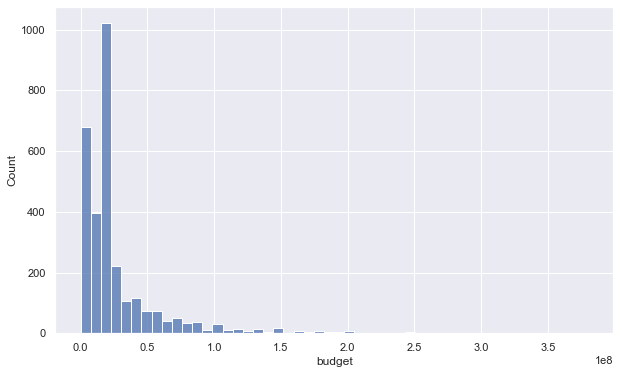

In [249]:
# log with buget feature
mean = train['budget'].mean()
train['budget'] = train['budget'].replace(0, mean) 

plt.figure(figsize=(10, 6))
sns.histplot(train['budget'], bins=50);

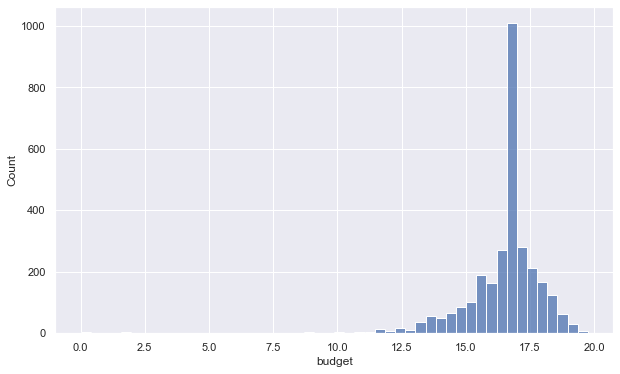

In [250]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(train['budget']), bins=50);

In [251]:
train['log_budget'] = np.log(train['budget'])

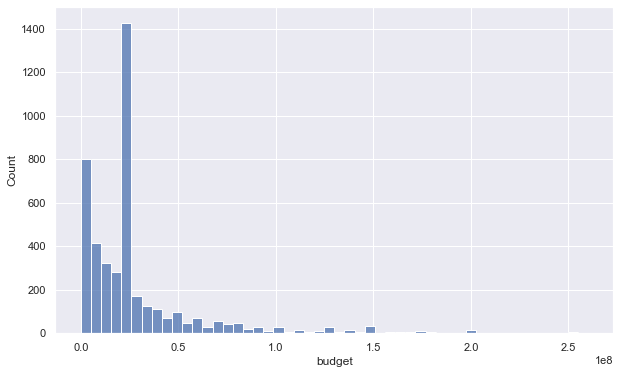

In [252]:
# log with buget feature
mean = test['budget'].mean()
test['budget'] = test['budget'].replace(0, mean) 

plt.figure(figsize=(10, 6))
sns.histplot(test['budget'], bins=50);

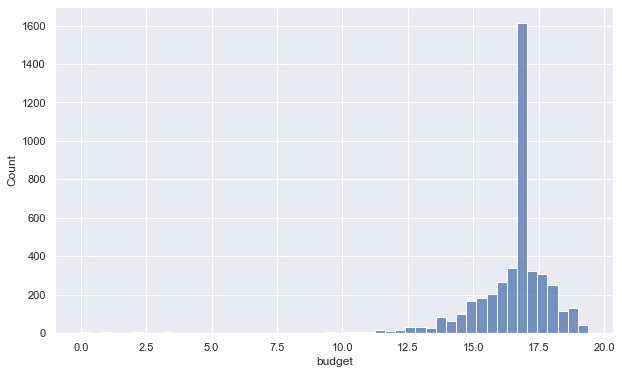

In [253]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(test['budget']), bins=50);

In [254]:
test['log_budget'] = np.log(test['budget'])

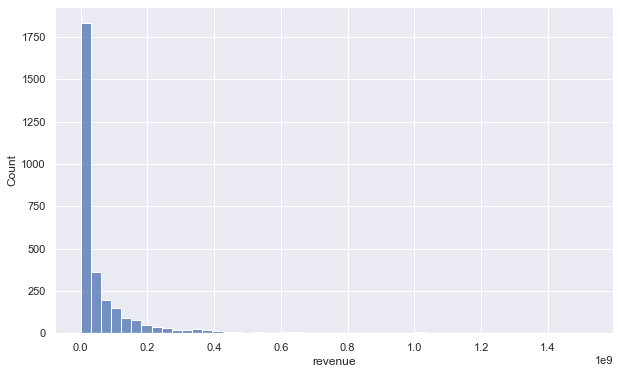

In [255]:
# revenue
plt.figure(figsize=(10, 6))
sns.histplot(train['revenue'], bins=50);

In [256]:
train['log_revenue'] = np.log(train['revenue'])

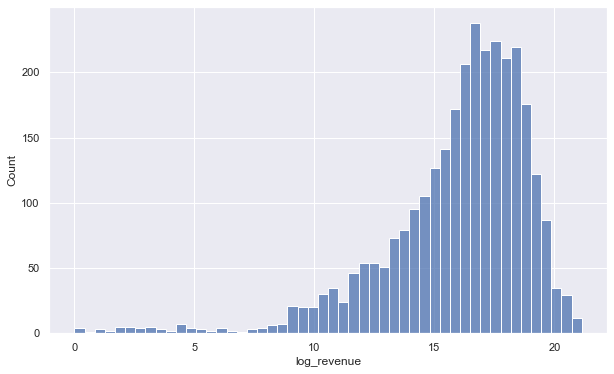

In [257]:
plt.figure(figsize=(10, 6))
sns.histplot(train['log_revenue'], bins=50);

### Differnent revenue in different languages

In [258]:
train['original_language'].unique()

array(['en', 'hi', 'ko', 'sr', 'fr', 'it', 'nl', 'zh', 'es', 'cs', 'ta',
       'cn', 'ru', 'tr', 'ja', 'fa', 'sv', 'de', 'te', 'pt', 'mr', 'da',
       'fi', 'el', 'ur', 'he', 'no', 'ar', 'nb', 'ro', 'vi', 'pl', 'hu',
       'ml', 'bn', 'id'], dtype=object)

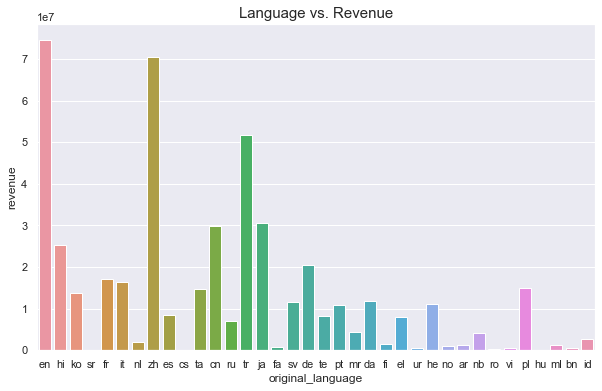

In [259]:
plt.figure(figsize=(10, 6))
sns.barplot(x=train['original_language'], y=train['revenue'], data=train, ci=0)
plt.title('Language vs. Revenue', fontsize=15);

### Split datetime to the feature of year, month, day and weekday columns
- to count revenue in weekday, month or year.
- to count the release of moives in year.

In [260]:
def convert_date(df):
    parse_date = ['year', 'month', 'day', 'weekday']
    for i in parse_date:
        df['release_date_' + i] = getattr(train['release_date'].dt, i).astype(int)
    return df

train = convert_date(train)
test = convert_date(test)

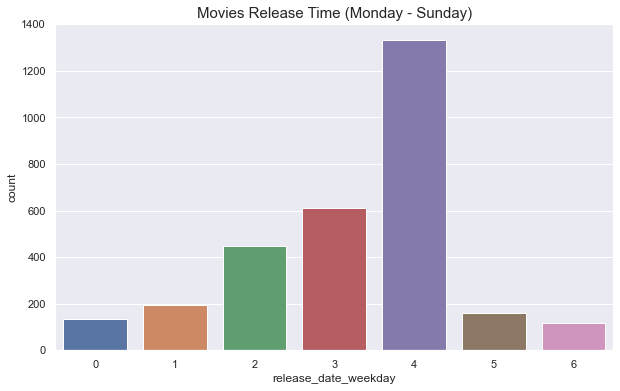

In [261]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train['release_date_weekday'])
plt.title('Movies Release Time (Monday - Sunday)', fontsize=15);

- The most release movies on Thursday

Text(0.5, 1.0, 'Revenue on different days of week of release')

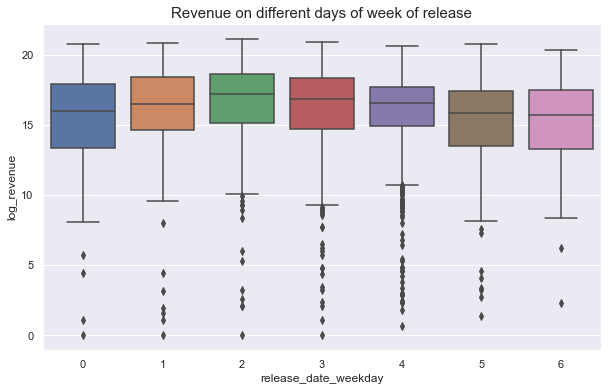

In [262]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='release_date_weekday', y='log_revenue', data=train)
plt.title('Revenue on different days of week of release', fontsize=15)

- The box office on Wednesday is the highest, on Friday is the lowest

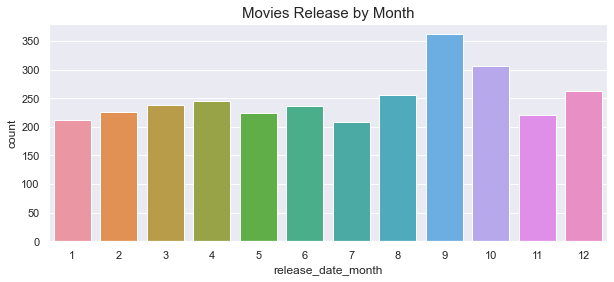

In [263]:
plt.figure(figsize=(10, 4))
sns.countplot(x=train['release_date_month'])
plt.title('Movies Release by Month', fontsize=15);

- The most release movies in September

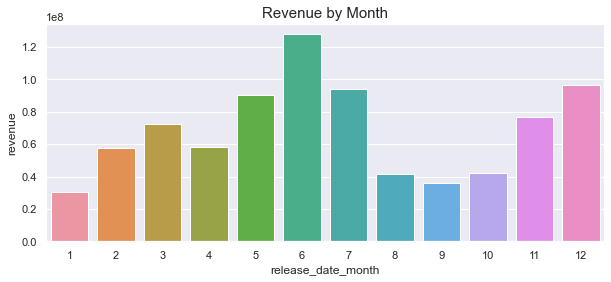

In [264]:
plt.figure(figsize=(10, 4))
month_pivot = train.pivot_table(index='release_date_month', values='revenue')
sns.barplot(x=month_pivot.index, y=month_pivot.revenue)
plt.title('Revenue by Month', fontsize=15);

- The most revenue in June

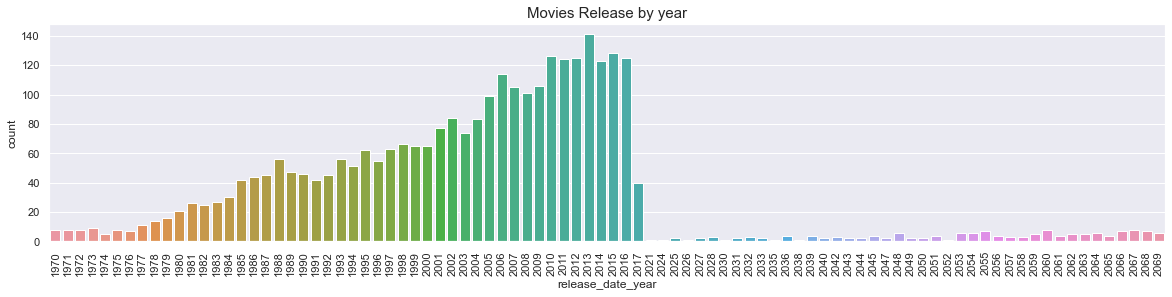

In [265]:
plt.figure(figsize=(20, 4))
sns.countplot(x=train['release_date_year'])
plt.xticks(rotation=90)
plt.title('Movies Release by year', fontsize=15);

- The movies release amount in years

In [266]:
train.shape

(3000, 226)

In [267]:
test.shape

(4398, 225)

# Modeling

### Drop some unrelated features

In [268]:
train = train.drop(['id', 'belongs_to_collection', 'homepage', 'imdb_id', 'original_title', 'poster_path', 
                    'release_date', 'tagline', 'title', 'num_genres', 'all_genres', 'original_language', 
                    'log_revenue', 'overview', 'status_Rumored', 'release_date_year', 
                    'release_date_year', 'release_date_day', 'release_date_weekday'], axis=1)

In [269]:
test = test.drop(['id', 'belongs_to_collection', 'homepage', 'imdb_id', 'original_title', 'poster_path', 
                  'release_date', 'tagline', 'title', 'num_genres', 'all_genres', 'original_language', 
                  'overview', 'status_Rumored', 'status_Released', 'release_date_year', 'release_date_year', 
                  'release_date_day', 'release_date_weekday'], axis=1)

In [270]:
train.head(1)

,budget,popularity,runtime,revenue,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_Keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Samuel L. Ja

In [271]:
test.head(1)

,budget,popularity,runtime,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_Keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Samuel L. Jackson,cr

In [272]:
train[['runtime']] = train[['runtime']].fillna(value=90.0)

In [273]:
train['runtime'].isnull().sum()

0

In [274]:
test[['runtime']] = test[['runtime']].fillna(value=100.0)

In [275]:
test[['release_date_month']] = test[['release_date_month']].fillna(value=9.0)

In [276]:
test.isnull().sum()

budget                               0
popularity                           0
runtime                              0
genre_Drama                          0
genre_Comedy                         0
                                    ..
cast_job_Set Decoration              0
cast_job_Makeup Artist               0
cast_job_Sound Re-Recording Mixer    0
log_budget                           0
release_date_month                   0
Length: 207, dtype: int64

### Training datat and Testing data

In [278]:
X = train.drop(columns=['revenue'])
y = (train['revenue'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

### Data scaling

In [279]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_val_sc = ss.transform(X_val)

### Training model

**Linear Regression**

In [280]:
lr_pipe = Pipeline (steps = [
    ('ss', StandardScaler()),
    ('lr', LinearRegression())
])

lr_pipe.fit(X_train_sc, y_train)

print('lr training score is:', lr_pipe.score(X_train_sc, y_train))
print('lr testing score is:', lr_pipe.score(X_val_sc, y_val))

lr training score is: 0.6893445449872593
lr testing score is: 0.5456072258565772


**Random Forest**

In [281]:
rdt_pipe = Pipeline (steps = [
    ('ss', StandardScaler()),
    ('rdt', RandomForestRegressor())
])

rdt_pipe.fit(X_train_sc, y_train)

print('rdt training score is:', rdt_pipe.score(X_train_sc,y_train))
print('rdt testing score is:', rdt_pipe.score(X_val_sc,y_val))

rdt training score is: 0.9530891626371302
rdt testing score is: 0.6688100352036532


**Lasso**

In [282]:
optimal_lasso = LassoCV(n_alphas=1000, cv = 3)
optimal_lasso.fit(X_train_sc, y_train)

optimal_lasso.alpha_

2027858.6860009178

In [283]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train_sc, y_train)

Lasso(alpha=2027858.6860009178)

In [284]:
lasso.score(X_train_sc, y_train), lasso.score(X_val_sc, y_val)

(0.6678331339282739, 0.5805481501212472)

**Bagging**

In [285]:
pipe_bag = Pipeline([
    ('ss', StandardScaler()),
    ('bag', BaggingRegressor())
])

In [286]:
pipe_bag.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('bag', BaggingRegressor())],
 'verbose': False,
 'ss': StandardScaler(),
 'bag': BaggingRegressor(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'bag__base_estimator': None,
 'bag__bootstrap': True,
 'bag__bootstrap_features': False,
 'bag__max_features': 1.0,
 'bag__max_samples': 1.0,
 'bag__n_estimators': 10,
 'bag__n_jobs': None,
 'bag__oob_score': False,
 'bag__random_state': None,
 'bag__verbose': 0,
 'bag__warm_start': False}

In [287]:
pipe_params = {'ss__with_mean': [True, False], 
                 'ss__with_std': [True, False],
                 'bag__max_features': [0.5, 1.0, 2.0], 
                 'bag__max_samples': [0.5, 0.75, 1, 2],
                 'bag__n_estimators': [5, 10, 20]}

pipe_gridsearch = GridSearchCV(pipe_bag, 
                                 pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5) # What number of folds in CV will we use?

pipe_gridsearch.fit(X_train_sc, y_train)

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py", line 320, in _fit
    raise ValueError("max_features must

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('bag', BaggingRegressor())]),
             param_grid={'bag__max_features': [0.5, 1.0, 2.0],
                         'bag__max_samples': [0.5, 0.75, 1, 2],
                         'bag__n_estimators': [5, 10, 20],
                         'ss__with_mean': [True, False],
                         'ss__with_std': [True, False]})

In [288]:
print('bag training score is:', pipe_gridsearch.score(X_train_sc, y_train))
print('bag testing score is:', pipe_gridsearch.score(X_val_sc, y_val))

bag training score is: 0.9173455636712994
bag testing score is: 0.6082718689111105


In [289]:
bag_pipe = Pipeline (steps = [
    ('ss', StandardScaler()),
    ('bag', BaggingRegressor())
])

bag_pipe.fit(X_train_sc, y_train)

print('bag training score is:', bag_pipe.score(X_train_sc, y_train))
print('bag testing score is:', bag_pipe.score(X_val_sc, y_val))

bag training score is: 0.9315812259022
bag testing score is: 0.6890779316738123


**GradientBoosting**

In [307]:
gboost_pipe = Pipeline (steps = [
    ('ss', StandardScaler()),
    ('gboost', GradientBoostingRegressor())
])

gboost_pipe.fit(X_train_sc, y_train)

print('gboost training score is:', gboost_pipe.score(X_train_sc, y_train))
print('gboost testing score is:', gboost_pipe.score(X_val_sc, y_val))

gboost training score is: 0.8631065141044012
gboost testing score is: 0.6679866886558916


In [290]:
gboost = GradientBoostingRegressor()
gboost_params = {
    'max_depth': [2,3,4],
    'n_estimators': [100, 125, 150],
    'learning_rate': [.08, .1, .12]
}
gb_gs = GridSearchCV(gboost, param_grid=gboost_params, cv=3)
gb_gs.fit(X_train_sc, y_train)

print('GradientBoosting training score is:', gb_gs.score(X_train_sc, y_train))
print('GradientBoosting testing score is:', gb_gs.score(X_val_sc, y_val))

GradientBoosting training score is: 0.794901847028702
GradientBoosting testing score is: 0.6460479217214254


In [309]:
y_pred = gb_gs.predict(test)

In [311]:
outcome = pd.DataFrame(data=y_pred, columns=['revenue'])
Id = pd.DataFrame(data=range(3001, 7399), columns=['id'])

submission = pd.concat([Id, outcome], axis=1, join='inner')
submission.to_csv('submission.csv', index=False)

**Neural Networks**

In [291]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor

In [292]:
model = Sequential()

In [293]:
n_input = X_train_sc.shape[1]
n_input

207

In [294]:
n_hidden = n_input

In [298]:
model.add(Dense(32, input_dim=(207,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam', metrics=['mae'])

history = model.fit(
    X_train_sc,
    y_train,
    validation_data=(X_val_sc, y_val), 
    epochs=200,
    batch_size=None
)

Epoch 1/200
85/85 [==============================] - 0s 5ms/step - loss: 59714348.0000 - mae: 59714348.0000 - val_loss: 65408572.0000 - val_mae: 65408572.0000
Epoch 2/200
85/85 [==============================] - 0s 3ms/step - loss: 52755844.0000 - mae: 52755844.0000 - val_loss: 58425256.0000 - val_mae: 58425256.0000
Epoch 3/200
85/85 [==============================] - 0s 2ms/step - loss: 50637152.0000 - mae: 50637152.0000 - val_loss: 56986172.0000 - val_mae: 56986172.0000
Epoch 4/200
85/85 [==============================] - 0s 3ms/step - loss: 50480084.0000 - mae: 50480084.0000 - val_loss: 56812484.0000 - val_mae: 56812484.0000
Epoch 5/200
85/85 [==============================] - 0s 2ms/step - loss: 50437236.0000 - mae: 50437236.0000 - val_loss: 57021748.0000 - val_mae: 57021748.0000
Epoch 6/200
85/85 [==============================] - 0s 3ms/step - loss: 50356996.0000 - mae: 50356996.0000 - val_loss: 56756720.0000 - val_mae: 56756720.0000
Epoch 7/200
85/85 [===========================

85/85 [==============================] - 0s 1ms/step - loss: 46398012.0000 - mae: 46398012.0000 - val_loss: 51719796.0000 - val_mae: 51719796.0000
Epoch 104/200
85/85 [==============================] - 0s 2ms/step - loss: 46413660.0000 - mae: 46413660.0000 - val_loss: 51745744.0000 - val_mae: 51745748.0000
Epoch 105/200
85/85 [==============================] - 0s 2ms/step - loss: 46329632.0000 - mae: 46329632.0000 - val_loss: 51560560.0000 - val_mae: 51560560.0000
Epoch 106/200
85/85 [==============================] - 0s 2ms/step - loss: 46308264.0000 - mae: 46308264.0000 - val_loss: 51568532.0000 - val_mae: 51568532.0000
Epoch 107/200
85/85 [==============================] - 0s 1ms/step - loss: 46277184.0000 - mae: 46277184.0000 - val_loss: 51445916.0000 - val_mae: 51445916.0000
Epoch 108/200
85/85 [==============================] - 0s 1ms/step - loss: 46220632.0000 - mae: 46220632.0000 - val_loss: 51309836.0000 - val_mae: 51309836.0000
Epoch 109/200
85/85 [===========================

Epoch 154/200
85/85 [==============================] - 0s 2ms/step - loss: 44742444.0000 - mae: 44742444.0000 - val_loss: 49388324.0000 - val_mae: 49388324.0000
Epoch 155/200
85/85 [==============================] - 0s 2ms/step - loss: 44731340.0000 - mae: 44731340.0000 - val_loss: 49280944.0000 - val_mae: 49280944.0000
Epoch 156/200
85/85 [==============================] - 0s 2ms/step - loss: 44710040.0000 - mae: 44710040.0000 - val_loss: 49257884.0000 - val_mae: 49257884.0000
Epoch 157/200
85/85 [==============================] - 0s 2ms/step - loss: 44667084.0000 - mae: 44667084.0000 - val_loss: 49309444.0000 - val_mae: 49309444.0000
Epoch 158/200
85/85 [==============================] - 0s 2ms/step - loss: 44635520.0000 - mae: 44635520.0000 - val_loss: 49241644.0000 - val_mae: 49241644.0000
Epoch 159/200
85/85 [==============================] - 0s 2ms/step - loss: 44620016.0000 - mae: 44620016.0000 - val_loss: 49252176.0000 - val_mae: 49252176.0000
Epoch 160/200
85/85 [=============

In [300]:
W,b = model.layers[0].get_weights()
print('Weight: ',W,'  bias: ',b)

Weight:  [[ 12.550016    29.663124    12.317134   ...  12.955378    29.479628
   29.829594  ]
 [ 14.264793    21.136232    12.398496   ...  13.606381    20.52972
   21.502357  ]
 [  7.582957    16.616251     7.3225956  ...   7.756915    13.836403
   16.940409  ]
 ...
 [ -9.340322     7.0592856  -10.003557   ...  -9.620857     5.095782
    7.2309713 ]
 [ 15.716858    28.47496     15.771237   ...  16.60473     28.161442
   28.792288  ]
 [ -0.37300107   5.1733627    1.1948656  ...  -0.10691816   4.045625
    5.076542  ]]   bias:  [14.830709 12.344652 14.853279 12.616557 14.946483 12.379802 12.570762
 12.022494 12.297631 15.09192  12.171649 15.836478 12.791297 12.356342
 12.869325 12.389242 15.265957 15.833551 14.85817  14.828532 12.041089
 11.921362 15.35556  16.002598 12.565603 15.621316 12.537969 12.160915
 14.83077  14.680134 14.829857 12.212718]


In [301]:
y_pred = model.predict(test)
y_pred

array([[2.5080358e+14],
       [9.7528342e+11],
       [2.5080374e+14],
       ...,
       [1.7717441e+14],
       [2.2148127e+13],
       [7.0985023e+11]], dtype=float32)

In [305]:
outcome = pd.DataFrame(data=y_pred, columns=['revenue'])
Id = pd.DataFrame(data=range(3001, 7399), columns=['id'])

submission = pd.concat([Id, outcome], axis=1, join='inner')
submission.to_csv('submission_2.csv', index = False)